In [1]:
print(3333)

3333


In [4]:
from src.preprocessing import preprocess_data

preprocess_data(data_path="./example_data/example_data.jsonl", deduplicate_threshold=0.9, deduplicate_ngram_n=3, output_path="example_data/example_math_problem_processed.jsonl")

ModuleNotFoundError: No module named 'src'

In [6]:
from datasets import load_dataset, Dataset

/Users/shawnlin/Documents/Project/2025/sari-data-pipeline/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# IFEval, LiveCodeBench, Arena-Hard
eval_datasets = {
        "aime_2024": (load_dataset("HuggingFaceH4/aime_2024", split="train"), "problem"),
        "aime_2025": (load_dataset("yentinglin/aime_2025", split="train"), "problem"),
        "math_500": (load_dataset("HuggingFaceH4/MATH-500", split="test"), "problem"),
        # "gpqa": (load_dataset("Idavidrein/gpqa", "gpqa_diamond", split="train", trust_remote_code=True), "Question"),
        "gpqa": (load_dataset("csv", data_files="../gpqa_diamond.csv", split="train"), "Question"),
        "ifeval": (load_dataset("google/IFEval", split="train"), "prompt"),
        "arena_hard": (load_dataset("pvduy/arena-hard", split="train"), "prompt"),

    }

In [12]:
eval_datasets["aime_2025"]

(Dataset({
     features: ['id', 'problem', 'answer', 'solution', 'url', 'year', '__index_level_0__'],
     num_rows: 30
 }),
 'problem')

In [13]:
dataset = load_dataset("csv", data_files="../gpqa_diamond.csv", split="train")

In [20]:
"Question" in dataset.features.keys()

True

In [22]:
# Preprocess the benchmark datasets
aime_2024 = load_dataset("HuggingFaceH4/aime_2024", split="train")["problem"]
aime_2025 = load_dataset("yentinglin/aime_2025", split="train")["problem"]
math_500 = load_dataset("HuggingFaceH4/MATH-500", split="test")["problem"]
gpqa = load_dataset("csv", data_files="../gpqa_diamond.csv", split="train")["Question"]
ifeval = load_dataset("google/IFEval", split="train")["prompt"]
arena_hard = load_dataset("pvduy/arena-hard", split="train")["conversation"]


In [43]:
# Arena-Hard
arena_hard_list = []
for conversation in arena_hard:
    if conversation[0].get("role") == "user":

        # print(conversation[0].get("content"))
        # print("------")
        arena_hard_list.append(conversation[0].get("content"))
len(arena_hard_list)


500

In [50]:

# Livecodebench
import json

raw_prompts = []
with open("../livecodebench_v5.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)
        raw_prompts.append(data["prompt"])
        # break
len(raw_prompts)

279

In [49]:
livecodebench_list = []
for prompt in raw_prompts:
    striped_prompt = prompt.lstrip("You will be given a question (problem specification) and will generate a correct Python program that matches the specification and passes all tests.\n\nQuestion: ")
    livecodebench_list.append(striped_prompt)
len(livecodebench_list)


279

In [52]:
from typing import Dict, List
results: Dict[str, List[str]] = {}
results["livecodebench"] = livecodebench_list

results["aime_2024"] = aime_2024
results["aime_2025"] = aime_2025
results["math_500"] = math_500
results["gpqa"] = gpqa
results["ifeval"] = ifeval
results["arena_hard"] = arena_hard_list

In [57]:
# Save the results to a json file with nice formatting
with open("../benchmark_data.json", "w") as f:
    json.dump(results, f, indent=4)


In [58]:
# check json
with open("../benchmark_data.json", "r") as f:
    data = json.load(f)
    for key, value in data.items():
        print(key)
        print(len(value))
        print("------") 


livecodebench
279
------
aime_2024
30
------
aime_2025
30
------
math_500
500
------
gpqa
198
------
ifeval
541
------
arena_hard
500
------


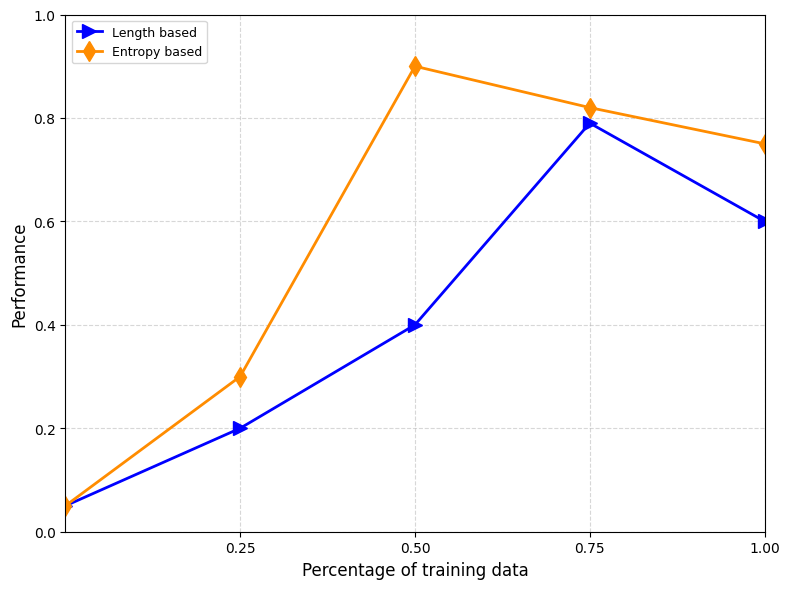

In [74]:
import matplotlib.pyplot as plt

# Sample Data (replace with actual values)
data = {
    "Length based": ([0, 0.25, 0.5, 0.75, 1], [0.05, 0.2, 0.4, 0.79, 0.6], ">", "blue"),
    "Entropy based": ([0, 0.25, 0.5, 0.75, 1], [0.05, 0.3, 0.9, 0.82, 0.75], "d", "darkorange"),
    # "LevT (2019)": ([5, 9, 12], [27, 27, 18.5], "D", "forestgreen"),
    # "LaNMT (2020)": ([4, 6, 8, 10, 17], [24, 24, 24, 23.5, 22], "^", "brown"),
    # "DisCo (2020)": ([4, 5, 6, 7, 10, 15], [26, 25.5, 25, 24, 20, 17], "o", "purple"),
    # "Transformer": ([1, 1], [27.5, 27], "s", "mediumpurple"),
    # "Ours": ([17], [27.5], "*", "black")
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
for label, (x, y, marker, color) in data.items():
    ax.plot(x, y, marker=marker, label=label if label != "Ours" else "", color=color, markersize=10, linewidth=2)

# # Annotation for Transformer
# ax.annotate("12-1", xy=(1, 27.5), xytext=(1.2, 27.7))
# ax.annotate("6-6", xy=(1, 27), xytext=(0.5, 26.2))

# Annotation for "Ours"
# ax.text(17.3, 27.5, "Ours", fontsize=14, fontweight="bold")
# ax.plot(17, 27.5, marker="*", markersize=20, color="black")

# Axis Settings
ax.set_xlabel("Percentage of training data", fontsize=12)
ax.set_ylabel("Performance", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Set custom x-ticks
ax.set_xticks([0.25, 0.5, 0.75, 1.0])

# Legend
ax.legend(loc="upper left", fontsize=9)

# Grid and layout
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.show()
plt.savefig("length_entropy_based_performance.png", dpi=300)


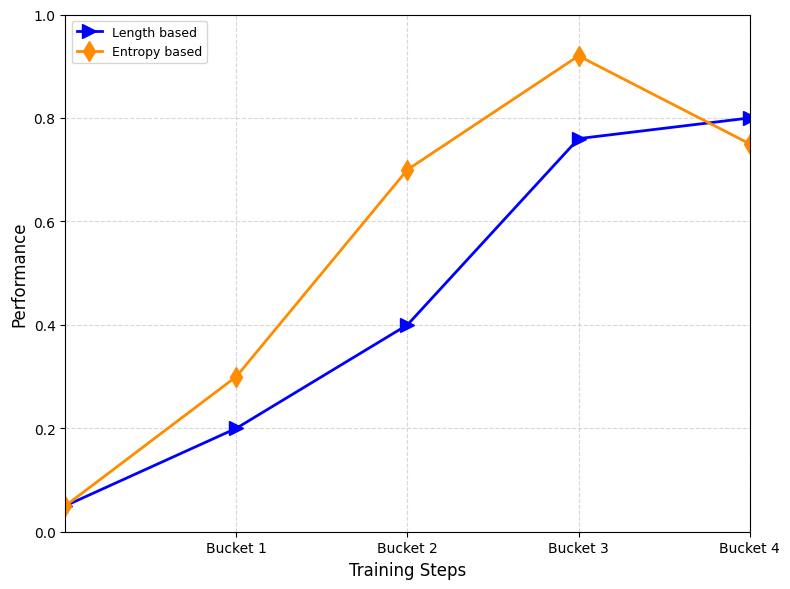

In [78]:
import matplotlib.pyplot as plt

# Sample Data (replace with actual values)
data = {
    "Length based": ([0, 0.25, 0.5, 0.75, 1], [0.05, 0.2, 0.4, 0.76, 0.8], ">", "blue"),
    "Entropy based": ([0, 0.25, 0.5, 0.75, 1], [0.05, 0.3, 0.7, 0.92, 0.75], "d", "darkorange"),
    # "LevT (2019)": ([5, 9, 12], [27, 27, 18.5], "D", "forestgreen"),
    # "LaNMT (2020)": ([4, 6, 8, 10, 17], [24, 24, 24, 23.5, 22], "^", "brown"),
    # "DisCo (2020)": ([4, 5, 6, 7, 10, 15], [26, 25.5, 25, 24, 20, 17], "o", "purple"),
    # "Transformer": ([1, 1], [27.5, 27], "s", "mediumpurple"),
    # "Ours": ([17], [27.5], "*", "black")
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
for label, (x, y, marker, color) in data.items():
    ax.plot(x, y, marker=marker, label=label if label != "Ours" else "", color=color, markersize=10, linewidth=2)

# # Annotation for Transformer
# ax.annotate("12-1", xy=(1, 27.5), xytext=(1.2, 27.7))
# ax.annotate("6-6", xy=(1, 27), xytext=(0.5, 26.2))

# Annotation for "Ours"
# ax.text(17.3, 27.5, "Ours", fontsize=14, fontweight="bold")
# ax.plot(17, 27.5, marker="*", markersize=20, color="black")

# Axis Settings
ax.set_xlabel("Training Steps", fontsize=12)
ax.set_ylabel("Performance", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Set custom x-ticks
ax.set_xticks([0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(["Bucket 1", "Bucket 2", "Bucket 3", "Bucket 4"])

# Legend
ax.legend(loc="upper left", fontsize=9)

# Grid and layout
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.show()
plt.savefig("length_entropy_based_performance.png", dpi=300)


In [79]:
# Data combination
from src.data_handler import DataHandler

def combine_data(data_paths: List[str], output_path: str):
    data_handler = DataHandler()
    for data_path in data_paths:
        data_handler.load_jsonl(data_path)
    data_handler.save_jsonl(output_path, append=True)

combine_data(["../example_data/example_data.jsonl", "../example_data/example_data_2.jsonl"], "../example_data/combined_data.jsonl")


ModuleNotFoundError: No module named 'src'

In [15]:
# Length distribution 
from src.data_handler import DataHandler

data_handler = DataHandler()
data = data_handler.load_jsonl("./example_data/example_data.jsonl")

data_name = "example_data"
text_list = [x.sft_data[0][1] if x.sft_data[0][1] else "" for x in data]
# Use tiktoken to count the number of tokens
import tiktoken
encoding = tiktoken.encoding_for_model("gpt-4")
lengths = [len(encoding.encode(text)) for text in text_list]
# lengths = [len(text.split(" ")) for text in text_list]
# save the lengths to a json file
# with open(f"./example_data/lengths_{data_name}.json", "w") as f:
#     json.dump(lengths, f)




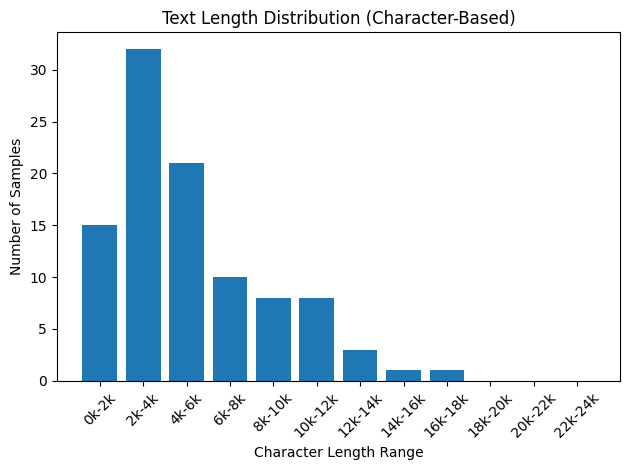

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Concatenate question and answer if needed
# text_list = [q + " " + a for q, a in data_handler.sft_data if isinstance(a, str)]

# Step 2: Compute character lengths
# lengths = [len(text.split(" ")) for text in text_list]

# Step 3: Create buckets (0-2k, 2k-4k, ..., 22k-24k)
bucket_size = 2000
max_length = 24000
bucket_ranges = list(range(0, max_length + bucket_size, bucket_size))
bucket_labels = [f"{i//1000}k-{(i + bucket_size)//1000}k" for i in bucket_ranges[:-1]]

# Step 4: Assign each length to a bucket
buckets = [min(length // bucket_size, len(bucket_labels) - 1) for length in lengths]
bucket_counts = Counter(buckets)

# Step 5: Format data for display
x_labels = bucket_labels
y_values = [bucket_counts[i] for i in range(len(bucket_labels))]

# Step 6: Plot the histogram
plt.bar(x_labels, y_values)
plt.xticks(rotation=45)
plt.xlabel("Character Length Range")
plt.ylabel("Number of Samples")
plt.title("Text Length Distribution (Character-Based)")
plt.tight_layout()
plt.show()


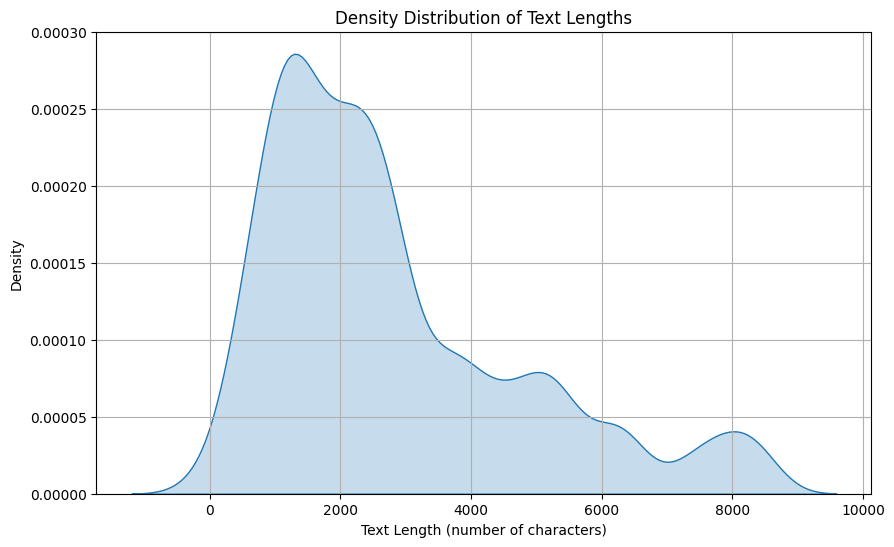

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: replace with your own list of texts
# texts = ["This is a short sentence.", "Here's another one.", "This one is a bit longer than the rest of the others in this list.", "Short."]

# Compute text lengths
lengths = [len(text.split(" ")) for text in text_list]

# Plot density
plt.figure(figsize=(10, 6))
sns.kdeplot(lengths, fill=True, bw_adjust=0.5)
plt.title("Density Distribution of Text Lengths")
plt.xlabel("Text Length (number of characters)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


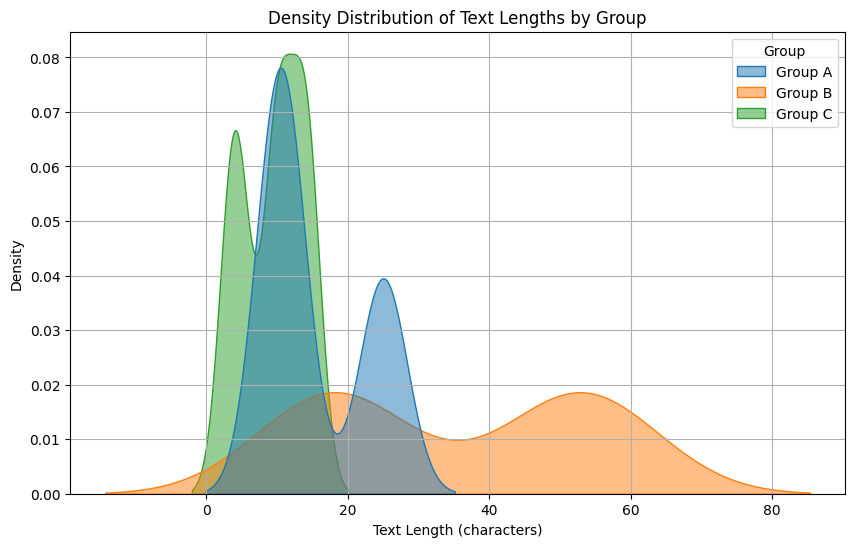

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: lists of text sets
text_groups = {
    "Group A": ["short text", "another one", "a bit longer text example"],
    "Group B": ["this is way longer than any other sentence in Group A", "just a little more"],
    "Group C": ["tiny", "tiny again", "tiny tiny tiny"]
}

# Prepare the data
lengths_data = []
for group_name, texts in text_groups.items():
    lengths = [len(text) for text in texts]
    for length in lengths:
        lengths_data.append((group_name, length))

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(lengths_data, columns=["Group", "Length"])

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Length", hue="Group", fill=True, common_norm=False, alpha=0.5, bw_adjust=0.5)
plt.title("Density Distribution of Text Lengths by Group")
plt.xlabel("Text Length (characters)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


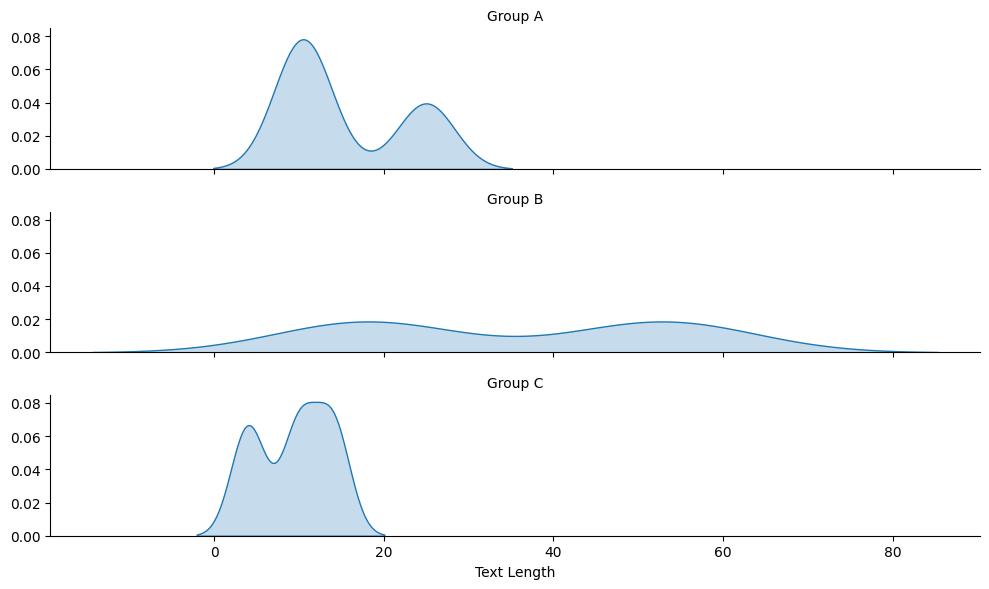

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample grouped data
text_groups = {
    "Group A": ["short text", "another one", "a bit longer text example"],
    "Group B": ["this is way longer than any other sentence in Group A", "just a little more"],
    "Group C": ["tiny", "tiny again", "tiny tiny tiny"]
}

# Prepare DataFrame
lengths_data = []
for group, texts in text_groups.items():
    for text in texts:
        lengths_data.append({"Group": group, "Length": len(text)})

df = pd.DataFrame(lengths_data)

# Plot with FacetGrid (one KDE per group)
g = sns.FacetGrid(df, row="Group", aspect=5, height=2, sharex=True)
g.map(sns.kdeplot, "Length", fill=True, bw_adjust=0.5)
g.set_titles(row_template="{row_name}")
g.set_axis_labels("Text Length", "")
plt.tight_layout()
plt.show()
